In [1]:
import pandas as pd
import numpy as np

In [21]:
dataset = pd.read_csv('dinkes-od_17486_persentase_pelayanan_kesehatan_pada_ibu_hamil__jenis_k.csv',sep=',')

In [3]:
dataset.shape

(243, 1)

In [22]:
dataset.head(15)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kunjungan,persentase_kunjungan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,K1,101.0,PERSEN,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,K4,91.8,PERSEN,2019
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,K1,107.2,PERSEN,2019
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,K4,94.8,PERSEN,2019
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,K1,107.8,PERSEN,2019
5,6,32,JAWA BARAT,3203,KABUPATEN CIANJUR,K4,95.5,PERSEN,2019
6,7,32,JAWA BARAT,3204,KABUPATEN BANDUNG,K1,98.0,PERSEN,2019
7,8,32,JAWA BARAT,3204,KABUPATEN BANDUNG,K4,96.8,PERSEN,2019
8,9,32,JAWA BARAT,3205,KABUPATEN GARUT,K1,106.9,PERSEN,2019
9,10,32,JAWA BARAT,3205,KABUPATEN GARUT,K4,94.4,PERSEN,2019


In [23]:
dataset_feature = dataset['nama_kabupaten_kota'].astype(str)

In [25]:
dataset_label = dataset['persentase_kunjungan']

In [26]:
dataset_feature

0         KABUPATEN BOGOR
1         KABUPATEN BOGOR
2      KABUPATEN SUKABUMI
3      KABUPATEN SUKABUMI
4       KABUPATEN CIANJUR
              ...        
238      KOTA TASIKMALAYA
239      KOTA TASIKMALAYA
240           KOTA BANJAR
241           KOTA BANJAR
242           KOTA BANJAR
Name: nama_kabupaten_kota, Length: 243, dtype: object

In [27]:
dataset_label

0      101.0
1       91.8
2      107.2
3       94.8
4      107.8
       ...  
238     97.7
239     84.6
240    106.6
241     99.5
242     83.0
Name: persentase_kunjungan, Length: 243, dtype: float64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\gabriella fani\AppData\Local\Temp\ipykernel_18716\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


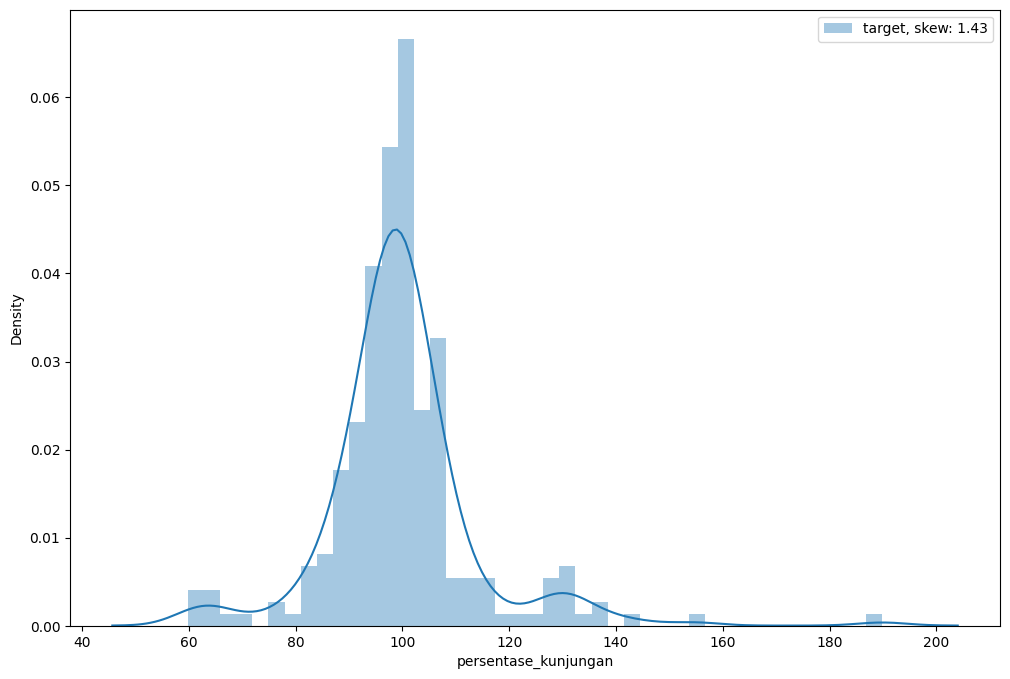

In [29]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [30]:
dataset_label.value_counts()

persentase_kunjungan
98.6     5
99.6     5
100.6    4
96.0     4
99.3     3
        ..
128.0    1
94.3     1
81.1     1
88.3     1
83.0     1
Name: count, Length: 169, dtype: int64

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
vectorizer = CountVectorizer()

In [33]:
X = vectorizer.fit_transform(dataset_feature)

In [34]:
#print(vectorizer.get_feature_names())
print(vectorizer.vocabulary_)


{'kabupaten': 12, 'bogor': 4, 'sukabumi': 20, 'cianjur': 6, 'bandung': 0, 'garut': 10, 'tasikmalaya': 22, 'ciamis': 5, 'kuningan': 15, 'cirebon': 8, 'majalengka': 16, 'sumedang': 21, 'indramayu': 11, 'subang': 19, 'purwakarta': 18, 'karawang': 13, 'bekasi': 3, 'barat': 2, 'pangandaran': 17, 'kota': 14, 'depok': 9, 'cimahi': 7, 'banjar': 1}


In [35]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['bandung' 'banjar' 'barat' 'bekasi' 'bogor' 'ciamis' 'cianjur' 'cimahi'
 'cirebon' 'depok' 'garut' 'indramayu' 'kabupaten' 'karawang' 'kota'
 'kuningan' 'majalengka' 'pangandaran' 'purwakarta' 'subang' 'sukabumi'
 'sumedang' 'tasikmalaya']


In [36]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [37]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [38]:
X2 = vectorizer2.fit_transform(dataset_feature)

In [39]:
#print(vectorizer2.get_feature_names())
feature_names = vectorizer2.get_feature_names_out()
print(feature_names)


['bandung barat' 'kabupaten bandung' 'kabupaten bekasi' 'kabupaten bogor'
 'kabupaten ciamis' 'kabupaten cianjur' 'kabupaten cirebon'
 'kabupaten garut' 'kabupaten indramayu' 'kabupaten karawang'
 'kabupaten kuningan' 'kabupaten majalengka' 'kabupaten pangandaran'
 'kabupaten purwakarta' 'kabupaten subang' 'kabupaten sukabumi'
 'kabupaten sumedang' 'kabupaten tasikmalaya' 'kota bandung' 'kota banjar'
 'kota bekasi' 'kota bogor' 'kota cimahi' 'kota cirebon' 'kota depok'
 'kota sukabumi' 'kota tasikmalaya']


In [40]:
print(X2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
dataset

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kunjungan,persentase_kunjungan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,K1,101.0,PERSEN,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,K4,91.8,PERSEN,2019
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,K1,107.2,PERSEN,2019
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,K4,94.8,PERSEN,2019
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,K1,107.8,PERSEN,2019
...,...,...,...,...,...,...,...,...,...
238,239,32,JAWA BARAT,3278,KOTA TASIKMALAYA,K4,97.7,PERSEN,2022
239,240,32,JAWA BARAT,3278,KOTA TASIKMALAYA,K6,84.6,PERSEN,2022
240,241,32,JAWA BARAT,3279,KOTA BANJAR,K1,106.6,PERSEN,2022
241,242,32,JAWA BARAT,3279,KOTA BANJAR,K4,99.5,PERSEN,2022


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
X = vectorizer.fit_transform(dataset_feature)

In [46]:
print(X.shape)

(243, 23)


In [47]:
features = vectorizer.get_feature_names_out()

In [48]:
features

array(['bandung', 'banjar', 'barat', 'bekasi', 'bogor', 'ciamis',
       'cianjur', 'cimahi', 'cirebon', 'depok', 'garut', 'indramayu',
       'kabupaten', 'karawang', 'kota', 'kuningan', 'majalengka',
       'pangandaran', 'purwakarta', 'subang', 'sukabumi', 'sumedang',
       'tasikmalaya'], dtype=object)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Contoh data teks
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit dan transformasi data teks
X = vectorizer.fit_transform(corpus)

# Mendapatkan nilai IDF
idf_values = vectorizer.idf_

print("IDF values:", idf_values)

IDF values: [1.91629073 1.22314355 1.51082562 1.         1.91629073 1.91629073
 1.         1.91629073 1.        ]


In [53]:
idfValues = vectorizer.idf_

In [54]:
d = dict(zip(features, 9 - idfValues))

In [55]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [73]:
panjang_sortedDict = len(sortedDict)
print("Panjang sortedDict:", panjang_sortedDict)


Panjang sortedDict: 9


In [79]:
for i in range(9):
    print(sortedDict[i])

('bekasi', 8.0)
('cianjur', 8.0)
('cirebon', 8.0)
('banjar', 7.77685644868579)
('barat', 7.4891743762340095)
('bandung', 7.083709268125845)
('bogor', 7.083709268125845)
('ciamis', 7.083709268125845)
('cimahi', 7.083709268125845)


In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [76]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

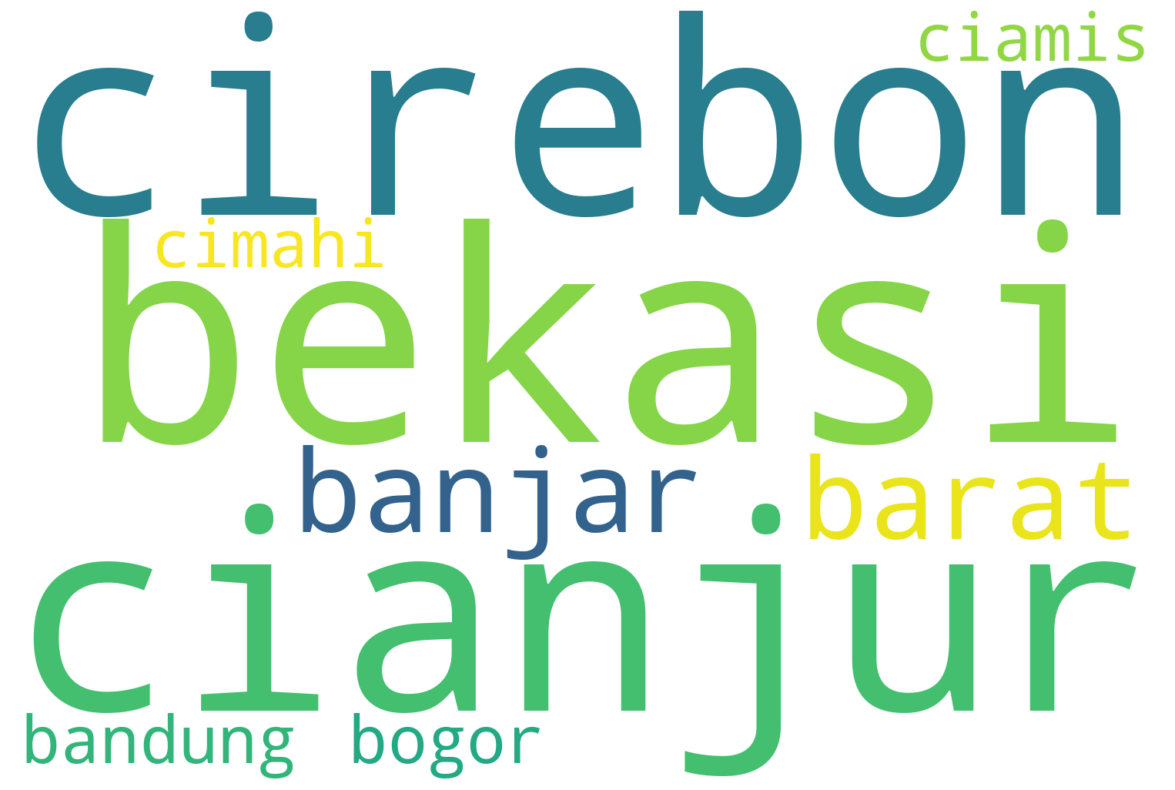

In [77]:
PlotWordCloud(d)

In [80]:
import re
import string
import time
from copy import deepcopy

In [82]:
import pandas as pd

In [ ]:
df = pd.read_csv('')